In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\ushak\\Desktop\\ujjwala\\Book 18.csv")

In [3]:
data=pd.DataFrame(data)

In [4]:
data=data.drop(['Prices.1','Prices.2'],axis=1)

In [5]:
data.shape

(1229, 2)

In [6]:
data.head()

,Date,Prices
0,13-04-2022,52700.0
1,12-04-2022,52562.5
2,11-04-2022,52500.0
3,08-04-2022,52212.5
4,07-04-2022,51987.5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1229 non-null   object 
 1   Prices  1229 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.3+ KB


In [8]:
data.dtypes

Date       object
Prices    float64
dtype: object

In [9]:
data['Date']=pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [10]:
data.describe(include='all')

C:\Users\ushak\programming\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Date,Prices
count,1229,1229.000000
unique,1229,NaN
top,2017-10-30 00:00:00,NaN
freq,1,NaN
first,2017-01-02 00:00:00,NaN
last,2022-04-13 00:00:00,NaN
mean,NaN,37832.173230
std,NaN,9393.835797
min,NaN,26630.000000
25%,NaN,29201.000000


In [11]:
data=data.sort_values('Date',ascending=True)

In [12]:
data.head(10)

,Date,Prices
1228,2017-01-02,27918.5
1227,2017-01-03,26676.0
1226,2017-01-04,27091.9
1225,2017-01-05,27078.6
1224,2017-01-06,27246.4
1223,2017-01-09,27311.2
1222,2017-01-10,27441.5
1221,2017-01-11,27599.0
1220,2017-01-12,27877.6
1219,2017-01-13,27795.3


In [13]:
data.tail(10)

,Date,Prices
9,2022-03-31,51687.5
8,2022-04-01,51520.0
7,2022-04-04,51905.0
6,2022-04-05,51750.0
5,2022-04-06,51912.5
4,2022-04-07,51987.5
3,2022-04-08,52212.5
2,2022-04-11,52500.0
1,2022-04-12,52562.5
0,2022-04-13,52700.0


In [14]:
mindate=min(data.Date)
maxdate=max(data.Date)
print(mindate)
print(maxdate)

2017-01-02 00:00:00
2022-04-13 00:00:00


# filling missing dates

In [15]:
seq=pd.DataFrame(pd.date_range(mindate,maxdate))

In [16]:
seq.head(10)

,0
0,2017-01-02
1,2017-01-03
2,2017-01-04
3,2017-01-05
4,2017-01-06
5,2017-01-07
6,2017-01-08
7,2017-01-09
8,2017-01-10
9,2017-01-11


In [17]:
seq.tail(10)

,0
1918,2022-04-04
1919,2022-04-05
1920,2022-04-06
1921,2022-04-07
1922,2022-04-08
1923,2022-04-09
1924,2022-04-10
1925,2022-04-11
1926,2022-04-12
1927,2022-04-13


In [18]:
seq.columns=['date']

In [19]:
data.columns

Index(['Date', 'Prices'], dtype='object')

In [20]:
data.all=pd.merge(seq,data,how='outer',left_on=['date'],right_on=['Date'],sort=True)

In [21]:
data.all.head(20)

,date,Date,Prices
0,2017-01-02,2017-01-02,27918.5
1,2017-01-03,2017-01-03,26676.0
2,2017-01-04,2017-01-04,27091.9
3,2017-01-05,2017-01-05,27078.6
4,2017-01-06,2017-01-06,27246.4
5,2017-01-07,NaT,NaN
6,2017-01-08,NaT,NaN
7,2017-01-09,2017-01-09,27311.2
8,2017-01-10,2017-01-10,27441.5
9,2017-01-11,2017-01-11,27599.0


In [22]:
data.all.tail(20)

,date,Date,Prices
1908,2022-03-25,2022-03-25,51687.5
1909,2022-03-26,NaT,NaN
1910,2022-03-27,NaT,NaN
1911,2022-03-28,2022-03-28,51712.5
1912,2022-03-29,2022-03-29,51637.5
1913,2022-03-30,2022-03-30,51687.5
1914,2022-03-31,2022-03-31,51687.5
1915,2022-04-01,2022-04-01,51520.0
1916,2022-04-02,NaT,NaN
1917,2022-04-03,NaT,NaN


In [23]:
data=data.all.drop(['Date'],axis=1)

# filling nan using interpolate

In [24]:
data.head(20)

,date,Prices
0,2017-01-02,27918.5
1,2017-01-03,26676.0
2,2017-01-04,27091.9
3,2017-01-05,27078.6
4,2017-01-06,27246.4
5,2017-01-07,NaN
6,2017-01-08,NaN
7,2017-01-09,27311.2
8,2017-01-10,27441.5
9,2017-01-11,27599.0


In [25]:
data['Prices']=data['Prices'].interpolate(method='linear',limit_direction='forward')

In [26]:
data_nomiss=data.copy()

In [27]:
data_nomiss.head(20)

,date,Prices
0,2017-01-02,27918.500000
1,2017-01-03,26676.000000
2,2017-01-04,27091.900000
3,2017-01-05,27078.600000
4,2017-01-06,27246.400000
5,2017-01-07,27268.000000
6,2017-01-08,27289.600000
7,2017-01-09,27311.200000
8,2017-01-10,27441.500000
9,2017-01-11,27599.000000


In [28]:
data_nomiss.isnull().sum()

date      0
Prices    0
dtype: int64

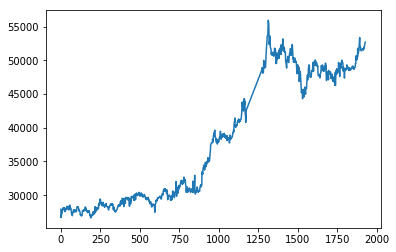

In [29]:
plt.plot(data_nomiss.Prices)

In [30]:
data_nomiss['month']=data_nomiss['date'].dt.month
data_nomiss['year']=data_nomiss['date'].dt.year

In [31]:
data_nomiss.head()

,date,Prices,month,year
0,2017-01-02,27918.5,1,2017
1,2017-01-03,26676.0,1,2017
2,2017-01-04,27091.9,1,2017
3,2017-01-05,27078.6,1,2017
4,2017-01-06,27246.4,1,2017


In [32]:
data['time_seq']=np.arange(1,len(data)+1)
data_nomiss.shape

(1928, 4)

In [33]:
data.tail()

,date,Prices,time_seq
1923,2022-04-09,52308.333333,1924
1924,2022-04-10,52404.166667,1925
1925,2022-04-11,52500.000000,1926
1926,2022-04-12,52562.500000,1927
1927,2022-04-13,52700.000000,1928


In [34]:
data.head()

,date,Prices,time_seq
0,2017-01-02,27918.5,1
1,2017-01-03,26676.0,2
2,2017-01-04,27091.9,3
3,2017-01-05,27078.6,4
4,2017-01-06,27246.4,5


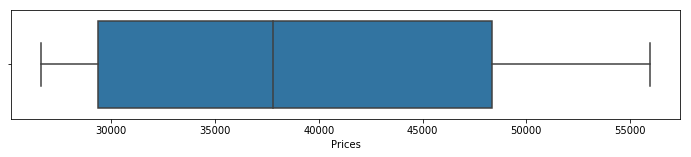

In [35]:
fig=plt.subplots(figsize=(12,2))
ax=sns.boxplot(x=data['Prices'],whis=1.5)         

# creating time sequence and splitting into train and test

In [36]:
x=data[['time_seq']]

In [37]:
y=data_nomiss['Prices']

In [38]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = sm.tsa.statespace.SARIMAX(data['Prices'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Prices   No. Observations:                 1928
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -13680.887
Date:                Thu, 27 Apr 2023   AIC                          27367.774
Time:                        19:36:01   BIC                          27384.465
Sample:                             0   HQIC                         27373.914
                               - 1928                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6386      0.130     -4.904      0.000      -0.894      -0.383
ma.L1          0.5665      0.136      4.173      0.000       0.300       0.833
sigma2      8.612e+04   1275.613     67.514      0.0

In [39]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = sm.tsa.statespace.SARIMAX(data['Prices'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Prices   No. Observations:                 1928
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -13680.799
Date:                Thu, 27 Apr 2023   AIC                          27369.597
Time:                        19:36:01   BIC                          27391.852
Sample:                             0   HQIC                         27377.784
                               - 1928                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5498      0.230     -2.388      0.017      -1.001      -0.099
ma.L1          0.4814      0.232      2.078      0.038       0.027       0.935
ma.L2          0.0163      0.027      0.614      0.5

In [40]:
from statsmodels.tsa.arima.model import ARIMA
model_sarima=ARIMA(data['Prices'].values,order=(1,1,1),seasonal_order=(1,0,1,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1928
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood              -13675.124
Date:                          Thu, 27 Apr 2023   AIC                          27360.248
Time:                                  19:36:02   BIC                          27388.067
Sample:                                       0   HQIC                         27370.482
                                         - 1928                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6145      0.135     -4.537      0.000      -0.880      -0.349
ma.L1          0.5404      0.141      3.839      0.

In [41]:
data_nomiss.set_index('date',inplace=True)

In [42]:
train=data.loc[data.time_seq<1446]
test=data.loc[data.time_seq>=1446]

In [43]:
print(train.shape)
print(test.shape)

(1445, 3)
(483, 3)


In [44]:
print(train.index.min())
print(train.index.max())
print(test.index.min())
print(test.index.max())

0
1444
1445
1927


C:\Users\ushak\programming\New folder\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ushak\programming\New folder\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ushak\programming\New folder\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


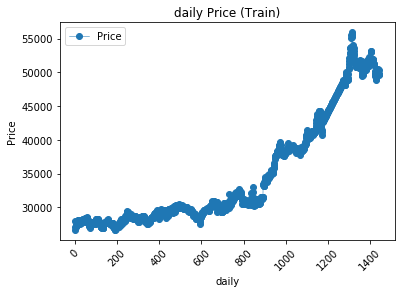

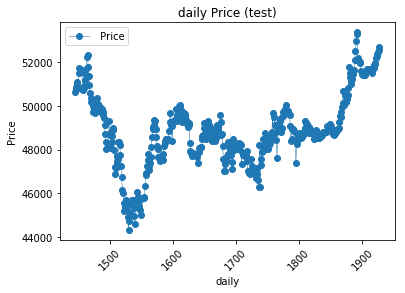

In [45]:
fig, ax = plt.subplots()
lines = plt.plot(train.index, train.Prices, '-o')
plt.setp(lines, linewidth=0.5)
plt.xticks(rotation = 45)
plt.title('daily Price (Train)')
plt.xlabel('daily')
plt.ylabel('Price')
plt.legend(['Price'],loc = 'best')
plt.show()
fig, ax = plt.subplots()
lines = plt.plot(test.index, test.Prices, '-o')
plt.setp(lines, linewidth=0.5)
plt.xticks(rotation = 45)
plt.title('daily Price (test)')
plt.xlabel('daily')
plt.ylabel('Price')
plt.legend([' Price'],loc = 'best')
plt.show()

# decomposition 

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [47]:
decomposition = seasonal_decompose(train.Prices,freq=365)

C:\Users\ushak\programming\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


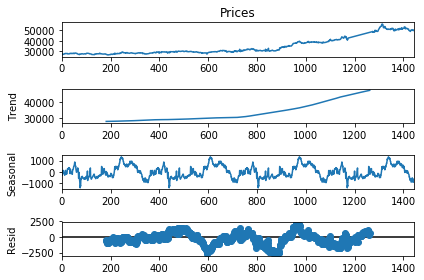

In [48]:
decomposition.plot()
plt.show()

# ACF and PACF

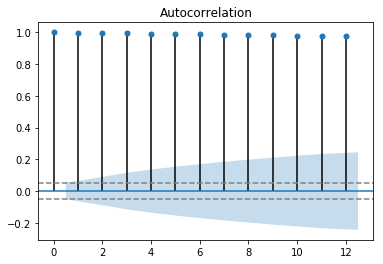

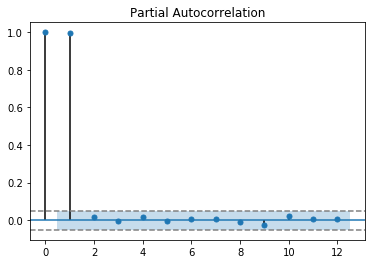

In [49]:

#### ACF: n th lag of ACF is the correlation between a day and n days before that. 
#PACF: The same as ACF with all intermediate correlations removed.

#ACF
plot_acf(train.Prices, zero=True, lags=int(24*0.5))
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--',color='gray')

#PACF
plot_pacf(train.Prices,zero=True,lags=int(24*0.5))
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.show()







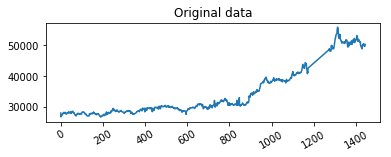

In [50]:
#### Looking at the Y scale in ACF we observe that both trend and seasonality is present.

#### Stationarize by differencing

# Before differencing
plt.subplot(212)
plt.plot(train.Prices)
plt.xticks(rotation=30)
plt.title("Original data")
plt.show()

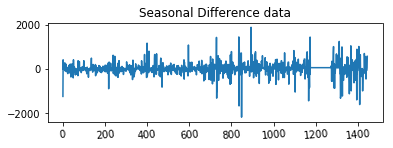

In [51]:
# After differencing
plt.subplot(212)
plt.plot(train.Prices.diff(1))
plt.xticks(rotation=365)
plt.title("Seasonal Difference data")
plt.show()


# acf and pacf after differencing with 1

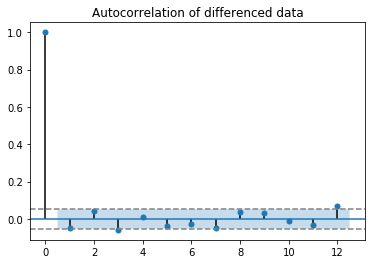

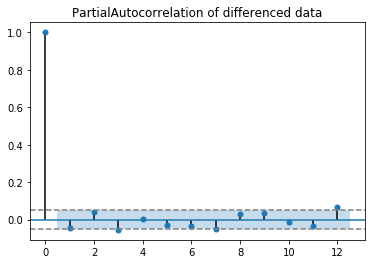

In [52]:
plot_acf(train.Prices.diff(1).dropna(),zero=True,lags=12,title='Autocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plot_pacf(train.Prices.diff(1).dropna(),zero=True,lags=12,title='PartialAutocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plt.show()


# adf test (diff 1)

In [53]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train.Prices.diff(1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.654067
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# plots after differencing with 2

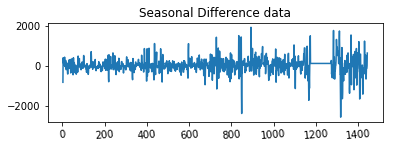

In [54]:
# After differencing
plt.subplot(212)
plt.plot(train.Prices.diff(2))
plt.xticks(rotation=365)
plt.title("Seasonal Difference data")
plt.show()


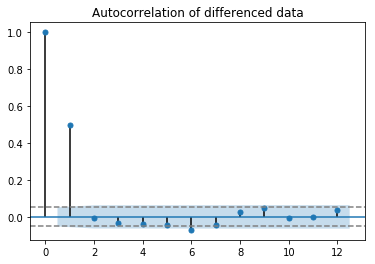

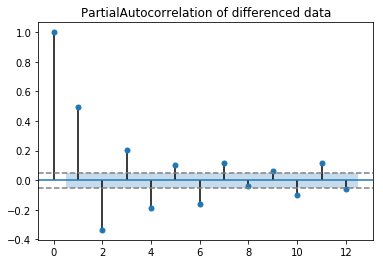

In [55]:
plot_acf(train.Prices.diff(2).dropna(),zero=True,lags=12,title='Autocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plot_pacf(train.Prices.diff(2).dropna(),zero=True,lags=12,title='PartialAutocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plt.show()


# adf test (diff 2)

In [56]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train.Prices.diff(2).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.067724
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# ARIMA

In [57]:
pip install statsmodels


The following command must be run outside of the IPython shell:

    $ pip install statsmodels

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [58]:
from statsmodels.tsa.arima.model import ARIMA

In [59]:
# we have took d as 1 after observing acf and pacf plots of both diff1 and diff2
#model 2,1,2 (trial and error)
model_arima = ARIMA(train['Prices'].values, order=(2,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1445
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10142.946
Date:                Thu, 27 Apr 2023   AIC                          20295.893
Time:                        19:36:04   BIC                          20322.269
Sample:                             0   HQIC                         20305.737
                               - 1445                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2308      0.299     -0.773      0.440      -0.816       0.355
ar.L2          0.6901      0.272      2.540      0.011       0.158       1.222
ma.L1          0.1822      0.296      0.615      0.5

In [60]:
# model 2,1,1.(trial and error)
model_arima = ARIMA(train['Prices'].values, order=(2,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1445
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -10142.979
Date:                Thu, 27 Apr 2023   AIC                          20293.959
Time:                        19:36:05   BIC                          20315.059
Sample:                             0   HQIC                         20301.835
                               - 1445                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9881      0.041    -23.871      0.000      -1.069      -0.907
ar.L2         -0.0267      0.018     -1.501      0.133      -0.062       0.008
ma.L1          0.9334      0.040     23.393      0.0

In [61]:
# model 1,1,1 (trial and error)
model_arima = ARIMA(train['Prices'].values, order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1445
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10143.412
Date:                Thu, 27 Apr 2023   AIC                          20292.824
Time:                        19:36:05   BIC                          20308.649
Sample:                             0   HQIC                         20298.731
                               - 1445                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9491      0.029    -32.442      0.000      -1.006      -0.892
ma.L1          0.9151      0.036     25.336      0.000       0.844       0.986
sigma2      7.405e+04   1161.480     63.757      0.0

In [62]:
#(1,1,1) model fitting
model_arima_forecast = model_arima_fit.forecast(steps = len(test))
print(model_arima_forecast)

[50306.31877773 50321.67688965 50307.10001791 50320.93538979
 50307.80379897 50320.26740883 50308.43780091 50319.66565746
 50309.00894225 50319.12356907 50309.52345555 50318.63522816
 50309.98695541 50318.19530572 50310.40449978 50317.79900111
 50310.78064507 50317.44198966 50311.11949597 50317.12037552
 50311.42475017 50316.83064906 50311.69973875 50316.56964867
 50311.94746251 50316.33452618 50312.17062473 50316.12271582
 50312.37166066 50315.93190624 50312.5527641  50315.76001521
 50312.71591133 50315.605167   50312.86288269 50315.46567181
 50312.995282   50315.34000742 50313.11455407 50315.22680252
 50313.22200043 50315.12482176 50313.31879361 50315.03295228
 50313.40598985 50314.95019156 50313.48454068 50314.87563647
 50313.55530328 50314.80847344 50313.61904984 50314.74796955
 50313.67647601 50314.69346456 50313.72820843 50314.64436368
 50313.77481164 50314.60013109 50313.81679419 50314.56028412
 50313.85461421 50314.52438793 50313.88868443 50314.49205081
 50313.91937661 50314.46

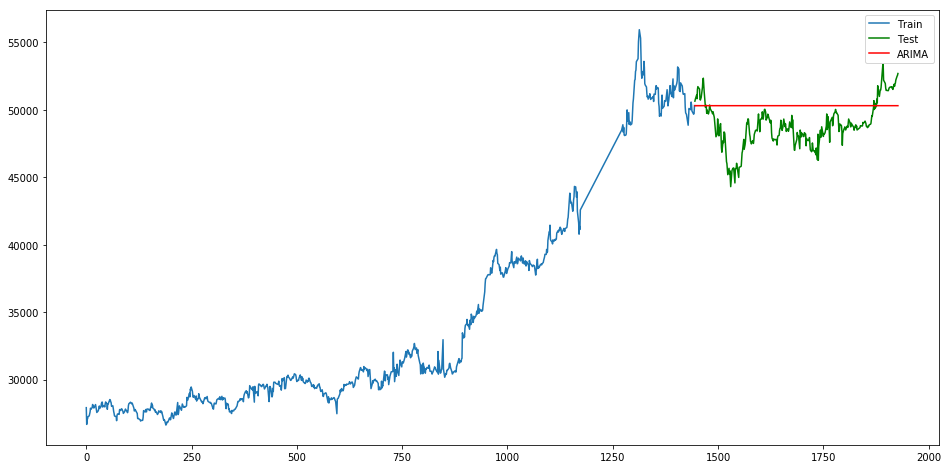

In [63]:
model_forecast= test.copy()
model_forecast['model_arima_forecast']=model_arima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Prices'], label='Train')
plt.plot(test['Prices'], label='Test',color='green')
plt.plot(model_forecast['model_arima_forecast'], label='ARIMA',color='red')
plt.legend(loc='best')
plt.show()

In [64]:
from sklearn import metrics

In [65]:
def error_metrics(train_act,train_pred,test_act,test_pred):
        print('*** Error metrics Train data ***')
        print('MAE Train:', metrics.mean_absolute_error(train_act, train_pred))
        print('MSE Train:', metrics.mean_squared_error(train_act, train_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(train_act, train_pred)))
        print('MAPE Train:', metrics.mean_absolute_percentage_error(train_act, train_pred))

        print('***\n Error metrics Test Data ***')

        print('MAE Test:', metrics.mean_absolute_error(test_act,test_pred))
        print('MSE Test:', metrics.mean_squared_error(test_act,test_pred))
        print('RMSE Test:', np.sqrt(metrics.mean_squared_error(test_act,test_pred)))
        print('MAPE Test:', metrics.mean_absolute_percentage_error(test_act,test_pred))
        

In [66]:
error_metrics(train['Prices'], model_arima_fit.forecast(steps = len(train)),test['Prices'], 
              model_arima_fit.forecast(steps=len(test)))


*** Error metrics Train data ***
MAE Train: 15807.335965509914
MSE Train: 306731347.3383153
RMSE Train: 17513.74738136631
MAPE Train: 0.5195615323382899
***
 Error metrics Test Data ***
MAE Test: 1898.4779229282512
MSE Test: 4959653.091279791
RMSE Test: 2227.0278604633104
MAPE Test: 0.039568156937150684


In [67]:
model_forecast

,date,Prices,time_seq,model_arima_forecast
1445,2020-12-17,50650.000000,1446,50306.318778
1446,2020-12-18,50792.500000,1447,50321.676890
1447,2020-12-19,50893.333333,1448,50307.100018
1448,2020-12-20,50994.166667,1449,50320.935390
1449,2020-12-21,51095.000000,1450,50307.803799
...,...,...,...,...
1923,2022-04-09,52308.333333,1924,50314.198241
1924,2022-04-10,52404.166667,1925,50314.198241
1925,2022-04-11,52500.000000,1926,50314.198241
1926,2022-04-12,52562.500000,1927,50314.198241


# auto arima

In [68]:
from pmdarima.arima import auto_arima

In [69]:
model = auto_arima(train.Prices, start_p=0, start_q=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1445
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -10140.964
Date:                Thu, 27 Apr 2023   AIC                          20289.928
Time:                        19:36:14   BIC                          20311.028
Sample:                             0   HQIC                         20297.803
                               - 1445                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     30.3004     13.876      2.184      0.029       3.104      57.497
ar.L1         -0.9479      0.030    -31.956      0.000      -1.006      -0.890
ma.L1          0.9132      0.037     25.019      0.000       0.842       0.985
sigma2       7.38e+04   1156.861     63.792      0.000    7.15e+04    7.61e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7604.27
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,0),seasonal_order=(1,1,1,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1445
Model:             ARIMA(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood              -10105.227
Date:                            Thu, 27 Apr 2023   AIC                          20218.455
Time:                                    19:36:18   BIC                          20239.522
Sample:                                         0   HQIC                         20226.321
                                           - 1445                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0564      0.013     -4.219      0.000      -0.083      -0.030
ar.S.L12       0.0934      0.015   

In [72]:
model_sarima_forecast = model_sarima_fit.forecast(steps = len(test))
print(model_sarima_forecast)

[50319.04061169 50325.35694958 50341.9608316  50394.84460819
 50415.0960921  50346.05679399 50391.48060239 50397.29327097
 50402.6261892  50372.05985891 50407.38060795 50500.7991324
 50529.12318306 50536.0272838  50555.99212251 50561.02378227
 50602.55423346 50569.57495156 50625.08200553 50636.96564708
 50648.32471561 50620.43049439 50652.74475893 50701.16946896
 50732.4630237  50739.4220387  50759.7008892  50760.26175975
 50803.78028971 50774.17006944 50830.61919387 50843.07004211
 50854.99212957 50827.3475616  50859.38093243 50903.60190241
 50935.1728958  50942.1370414  50962.4452298  50962.5883977
 51006.29267244 50976.99722121 51033.53436261 51046.03820456
 51058.01289448 51030.39165144 51062.39877856 51106.22699611
 51137.82391039 51144.78853534 51165.09946476 51165.203607
 51208.92523574 51179.65919315 51236.20455792 51248.71335104
 51260.69295557 51233.07389175 51265.07856695 51308.87008991
 51340.46942597 51347.4340957  51367.74528121 51367.84577731
 51411.56902742 51382.305732

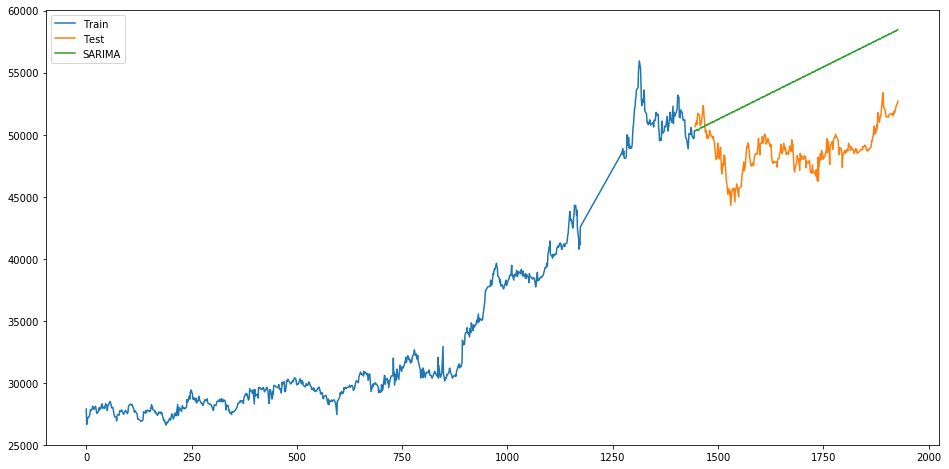

In [73]:
model_forecast= test.copy()
model_forecast['SARIMA'] = model_sarima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Prices'], label='Train')
plt.plot(test['Prices'], label='Test')
plt.plot(model_forecast['SARIMA'], label='SARIMA')
plt.legend()
plt.show()

In [74]:
model_forecast

,date,Prices,time_seq,SARIMA
1445,2020-12-17,50650.000000,1446,50319.040612
1446,2020-12-18,50792.500000,1447,50325.356950
1447,2020-12-19,50893.333333,1448,50341.960832
1448,2020-12-20,50994.166667,1449,50394.844608
1449,2020-12-21,51095.000000,1450,50415.096092
...,...,...,...,...
1923,2022-04-09,52308.333333,1924,58357.655367
1924,2022-04-10,52404.166667,1925,58401.443109
1925,2022-04-11,52500.000000,1926,58433.042694
1926,2022-04-12,52562.500000,1927,58440.007369


# p=1,q=1,d=1 and P=1,D=1,Q=1,m=12

In [76]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,1),seasonal_order=(1,1,1,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1445
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -10109.100
Date:                          Thu, 27 Apr 2023   AIC                          20228.200
Time:                                  20:20:42   BIC                          20254.534
Sample:                                       0   HQIC                         20238.033
                                         - 1445                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9998      0.738     -1.354      0.176      -2.447       0.448
ma.L1          0.9997      0.581      1.721      0.

# p=2,q=1,d=2 and P=1,D=0,Q=1,m=12

In [77]:
model_sarima=ARIMA(train['Prices'].values,order=(2,1,2),seasonal_order=(1,0,1,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1445
Model:             ARIMA(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood              -10139.102
Date:                            Thu, 27 Apr 2023   AIC                          20292.204
Time:                                    20:20:49   BIC                          20329.130
Sample:                                         0   HQIC                         20305.987
                                           - 1445                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1853      0.233     -0.794      0.427      -0.643       0.272
ar.L2          0.7288      0.202   

# p=1,q=1,d=1 and P=1,D=0,Q=1,m=12

In [78]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,1),seasonal_order=(1,0,1,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1445
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood              -10139.729
Date:                          Thu, 27 Apr 2023   AIC                          20289.459
Time:                                  20:20:50   BIC                          20315.834
Sample:                                       0   HQIC                         20299.303
                                         - 1445                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9423      0.036    -26.132      0.000      -1.013      -0.872
ma.L1          0.9096      0.043     21.310      0.

# (1,1,1)(1,0,1,12) model fitting sarima

In [79]:
model_sarima_forecast = model_sarima_fit.forecast(steps = len(test))
print(model_sarima_forecast)

[50305.15008095 50354.78384612 50362.24624454 50409.6275673
 50382.5024296  50370.58033449 50361.47562277 50360.69709497
 50354.34052931 50327.034594   50309.84515041 50371.41913104
 50362.91062314 50354.48414448 50335.62946591 50326.51342459
 50326.4456727  50345.02869053 50337.56600909 50349.22205793
 50341.74101778 50365.24110227 50364.30160055 50342.76855085
 50338.59633949 50350.65261194 50352.53000733 50364.04309717
 50357.47147681 50354.51458756 50352.33617253 50352.1046428
 50350.5921153  50343.88993341 50339.72873896 50354.72613096
 50352.68005111 50350.59410496 50346.01908835 50343.76807475
 50343.7758513  50348.28902387 50346.48898696 50349.31386309
 50347.50692697 50353.22519207 50353.01288808 50347.74065921
 50346.7373492  50349.66601785 50350.13771417 50352.93538836
 50351.34318963 50350.61018155 50350.08902214 50350.02252826
 50349.66272527 50348.01787268 50347.01048134 50350.66345286
 50350.17142266 50349.65525928 50348.54508929 50347.98941563
 50347.99716093 50349.0933

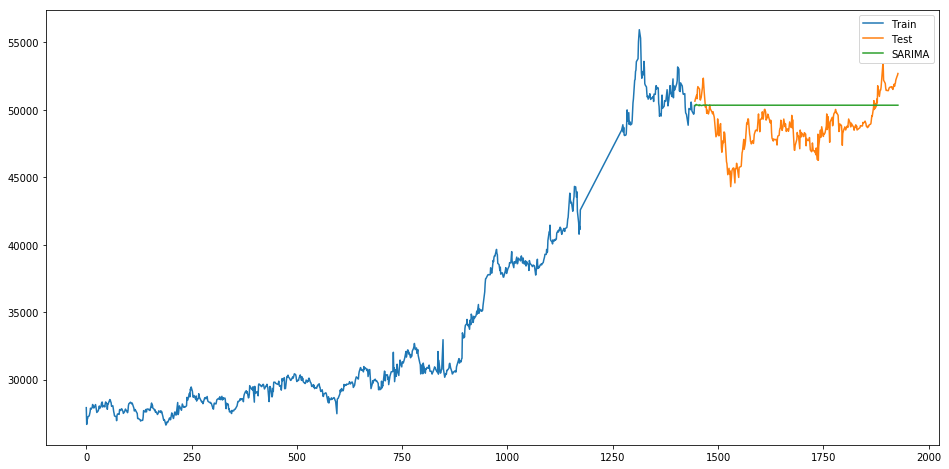

In [80]:
model_forecast['SARIMA'] = model_sarima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Prices'], label='Train')
plt.plot(test['Prices'], label='Test')
plt.plot(model_forecast['SARIMA'], label='SARIMA')
plt.legend()
plt.show()

In [81]:
error_metrics(train['Prices'], model_sarima_fit.forecast(steps=len(train)),test['Prices'], 
              model_sarima_fit.forecast(steps=len(test)))

*** Error metrics Train data ***
MAE Train: 15836.972013330846
MSE Train: 307828925.66608137
RMSE Train: 17545.054165378955
MAPE Train: 0.5205143017732609
***
 Error metrics Test Data ***
MAE Test: 1921.9309043897506
MSE Test: 5064811.427569063
RMSE Test: 2250.5135919538598
MAPE Test: 0.04006195897948982


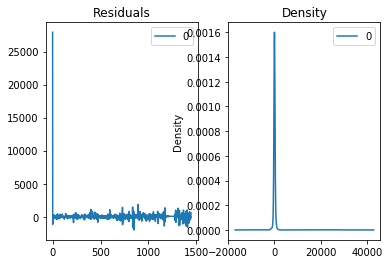

In [82]:
# Plot residual errors
residuals = pd.DataFrame(model_sarima_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [83]:
model_forecast

,date,Prices,time_seq,SARIMA
1445,2020-12-17,50650.000000,1446,50305.150081
1446,2020-12-18,50792.500000,1447,50354.783846
1447,2020-12-19,50893.333333,1448,50362.246245
1448,2020-12-20,50994.166667,1449,50409.627567
1449,2020-12-21,51095.000000,1450,50382.502430
...,...,...,...,...
1923,2022-04-09,52308.333333,1924,50349.356568
1924,2022-04-10,52404.166667,1925,50349.356568
1925,2022-04-11,52500.000000,1926,50349.356568
1926,2022-04-12,52562.500000,1927,50349.356568


# (1,1,1) (0,1,1,7)

In [84]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,1),seasonal_order=(0,1,1,7))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                    
Dep. Variable:                               y   No. Observations:                 1445
Model:             ARIMA(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood              -10132.140
Date:                         Thu, 27 Apr 2023   AIC                          20272.280
Time:                                 20:21:13   BIC                          20293.361
Sample:                                      0   HQIC                         20280.150
                                        - 1445                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9490      0.030    -31.244      0.000      -1.009      -0.889
ma.L1          0.9213      0.037     24.829      0.000     

# (1,1,1)(1,1,1,7)

In [85]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,1),seasonal_order=(1,1,1,7))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                    
Dep. Variable:                               y   No. Observations:                 1445
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -10138.641
Date:                         Thu, 27 Apr 2023   AIC                          20287.283
Time:                                 20:21:15   BIC                          20313.634
Sample:                                      0   HQIC                         20297.121
                                        - 1445                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      0.077    -12.952      0.000      -1.151      -0.849
ma.L1          0.9999      0.080     12.523      0.000     

# (1,1,1)(1,1,0)

In [86]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,1),seasonal_order=(1,1,0,7))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1445
Model:             ARIMA(1, 1, 1)x(1, 1, [], 7)   Log Likelihood              -10377.266
Date:                          Thu, 27 Apr 2023   AIC                          20762.533
Time:                                  20:21:17   BIC                          20783.614
Sample:                                       0   HQIC                         20770.403
                                         - 1445                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9986      0.005   -197.220      0.000      -1.009      -0.989
ma.L1          0.9976      0.006    158.849      0.

# (1,1,1)(1,1,0,7)

In [87]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,1),seasonal_order=(1,1,0,7))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1445
Model:             ARIMA(1, 1, 1)x(1, 1, [], 7)   Log Likelihood              -10377.266
Date:                          Thu, 27 Apr 2023   AIC                          20762.533
Time:                                  20:21:21   BIC                          20783.614
Sample:                                       0   HQIC                         20770.403
                                         - 1445                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9986      0.005   -197.220      0.000      -1.009      -0.989
ma.L1          0.9976      0.006    158.849      0.

# (1,1,1)(1,2,1,7)

In [88]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,1),seasonal_order=(1,2,1,7))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:                               y   No. Observations:                 1445
Model:             ARIMA(1, 1, 1)x(1, 2, 1, 7)   Log Likelihood              -10378.981
Date:                         Thu, 27 Apr 2023   AIC                          20767.963
Time:                                 20:21:32   BIC                          20794.290
Sample:                                      0   HQIC                         20777.794
                                        - 1445                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9991      0.005   -193.888      0.000      -1.009      -0.989
ma.L1          0.9984      0.007    152.702      0.000     